In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nvidia_model import load_multi_dataset,filter_dataset,resample_df
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
train_dataset_folder = [("track1_new_1/",1,False),
                        ("track1_rec_1/",1,False),
                        ("track1_rec_2",1,False),
                        # ("track1_rec_3",1),
                        # ("track2_7",1,False),
                        # ("track2_8",1,False),
                        # ("track2_9",1,False),
                        # ("track2_10",1,False),
                         ("track2_11",1,False),
                         ("track2_13",1,False),
                         ("track2_rev_1",1,False),
                        # ("track2_rec_5",1,True),
                        # ("track2_rec_6",1,True),
                         ("track2_rec_8",1,True),
                         ("track2_rec_7",1,True),
                         ("track2_rec_9",1,True),
                        ("track2_rec_10",10,True)]
                        #("track2_curve_1",1,False)]

In [8]:
log_df=load_multi_dataset(train_dataset_folder)

In [9]:
log_df.head()

,center,left,right,steering,throttle,brake,speed
0,./data/track1_new_1/IMG/center_2017_03_19_21_4...,./data/track1_new_1/IMG/left_2017_03_19_21_48_...,./data/track1_new_1/IMG/right_2017_03_19_21_48...,0.0,0.0,0.0,4.044739
1,./data/track1_new_1/IMG/center_2017_03_19_21_4...,./data/track1_new_1/IMG/left_2017_03_19_21_48_...,./data/track1_new_1/IMG/right_2017_03_19_21_48...,0.0,0.0,0.0,4.012237
2,./data/track1_new_1/IMG/center_2017_03_19_21_4...,./data/track1_new_1/IMG/left_2017_03_19_21_48_...,./data/track1_new_1/IMG/right_2017_03_19_21_48...,0.0,0.0,0.0,3.979996
3,./data/track1_new_1/IMG/center_2017_03_19_21_4...,./data/track1_new_1/IMG/left_2017_03_19_21_48_...,./data/track1_new_1/IMG/right_2017_03_19_21_48...,0.0,0.0,0.0,3.948015
4,./data/track1_new_1/IMG/center_2017_03_19_21_4...,./data/track1_new_1/IMG/left_2017_03_19_21_48_...,./data/track1_new_1/IMG/right_2017_03_19_21_48...,0.0,0.0,0.0,3.916291


In [10]:
log_df.shape

(61538, 7)

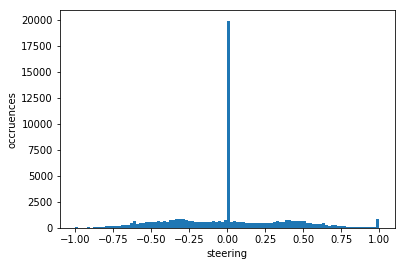

In [12]:
plt.hist(log_df['steering'],bins=100)
plt.xlabel("steering")
plt.ylabel("occruences")
plt.savefig("./data_figs/hist_raw.png")
plt.show()

## Histograms after filtering

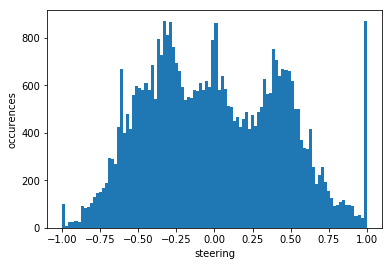

In [21]:
filtered_log_df=filter_dataset(log_df,portion=100)
plt.hist(filtered_log_df["steering"],bins=100)
plt.xlabel("steering")
plt.ylabel("occurences")
plt.savefig("./data_figs/hist_1st_pass.png")
plt.show()

In [22]:
counts,bin_bound=np.histogram(filtered_log_df["steering"].values,bins=100)
print(len(counts))
print(len(bin_bound))

100
101


In [23]:
f_log_df=resample_df(filtered_log_df)

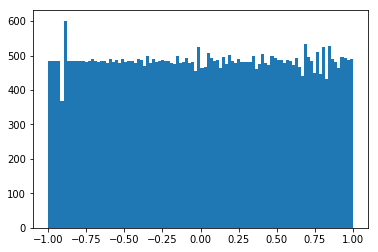

In [24]:
plt.hist(f_log_df["steering"],bins=100)
plt.show()

In [25]:
n_filtered_log_df.shape[0]

NameError: name 'n_filtered_log_df' is not defined

In [ ]:
plt.hist(log_df["steering"],bins=100)
plt.show()

In [ ]:
f_log_df=filter_dataset(log_df)
print(f_log_df.shape[0])

In [ ]:
plt.hist(f_log_df["steering"],bins=100)
plt.show()

In [ ]:
## Show a couple of images

In [ ]:
import cv2
import os
img_dir='./sample behavioral cloning data/'

rand_idx=np.random.randint(log_df.shape[0])

c_file=log_df.iloc[rand_idx,:]['center']
print(c_file)
img=cv2.imread(os.path.join(img_dir,c_file))
plt.imshow(img)

print(img.shape)
print("The dimension of images:%s,%s, %s"%img.shape)

### Resize the image

In [26]:
import tensorflow as tf

In [27]:
p_ch, p_row, p_col = 3, 224, 224
#p_ch, p_row, p_col = 3, 160, 320
img_placeholder = tf.placeholder("uint8", (None, 160, 320, 3))
single_img_placeholder=tf.placeholder("uint8",(160,320,3))
resize_op = tf.image.resize_image_with_crop_or_pad(single_img_placeholder, p_row, p_col)

TypeError: Image data can not convert to float

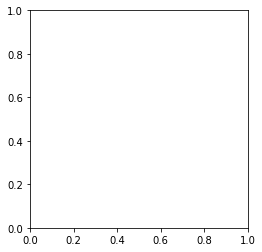

In [28]:
sample_image_file='./sample behavioral cloning data/IMG/center_2016_12_01_13_30_48_287.jpg'
img=np.zeros((1,160,320,3))
temp_img=cv2.imread(sample_image_file)
img[0]=temp_img
plt.imshow(temp_img)
img=img.astype('uint8')

In [ ]:
plt.imshow(img[0])

In [ ]:
with tf.Session() as sess:
    resized_img=sess.run(resize_op,feed_dict={img_placeholder:img})
    plt.imshow(resized_img[0])

In [ ]:
with tf.Session() as sess:
    resized_img=sess.run(resize_op,feed_dict={single_img_placeholder:temp_img})
    plt.imshow(resized_img)

### Resize the image and keep the ratio

In [ ]:
p_ch, p_row, p_col = 3, 80, 160
img_placeholder = tf.placeholder("uint8", (None, 160, 320, 3))
resize_op = tf.image.resize_images(img_placeholder, (p_row, p_col), method=0)

In [ ]:
with tf.Session() as sess:
    resized_img=sess.run(resize_op,feed_dict={img_placeholder:img})

In [ ]:
plt.imshow(resized_img[0].astype('uint8'))